In [11]:
import pandas as pd 
import numpy as np 

In [22]:
df = pd.read_csv('data/мокрое просеивание все объекты.csv')
df['column'] = df["Размер сухого агрегата"] +' ' +  df["Размеры фракций"]
df = df[['Год',"Тип обработки" ,"повторность","GPS №",	"region", "column","Вес образца, г" ]]
df = df.pivot_table("Вес образца, г",['Год',"Тип обработки" ,"повторность","GPS №",	"region"],"column").reset_index()
df = df[df['Год'].isin([2019,2022])]
df = df[df["region"].isin(["архангельский","урожайное"])]
df = df[~df["GPS №"].isin(["645","647","646"])]
df['key'] = df["region"] + df["Тип обработки"] + df["повторность"].astype(str)


In [24]:
df['sum>10'] =df['>10 1-0.25'] + df['>10 <0.25']
df['sum10-7'] = df['10-7 1-0.25'] + df['10-7 <0.25']
df['sum7-5'] = df['7-5 1-0.25'] + df['7-5 <0.25']
df['sum5-3'] = df['5-3 1-0.25'] + df['5-3 <0.25']
df


column,Год,Тип обработки,повторность,GPS №,region,10-7 1-0.25,10-7 2-1,10-7 3-2,10-7 4-3,10-7 5-4,...,>10 3-2,>10 5-3,>10 7-5,>10 <0.25,>10 >10,key,sum>10,sum10-7,sum7-5,sum5-3
3,2019,ПП,1,Архангельский,архангельский,4.020,1.740,1.340,1.610,1.300,...,1.120,2.770,1.660,3.530,6.380,архангельскийПП1,5.990,8.550,9.050,10.800
5,2019,ПП,2,Архангельский,архангельский,1.800,1.210,0.540,1.070,2.040,...,1.550,3.980,1.980,4.280,3.040,архангельскийПП2,6.890,5.710,9.740,9.300
7,2019,ПП,3,Архангельский,архангельский,4.730,0.870,1.020,1.600,2.200,...,1.090,1.980,0.770,3.340,8.220,архангельскийПП3,5.820,10.040,8.770,11.450
9,2019,ПП,4,Архангельский,архангельский,3.470,2.440,0.890,1.730,2.290,...,1.270,2.350,0.700,4.090,4.930,архангельскийПП4,7.890,7.360,10.140,11.070
11,2019,ПП,5,Архангельский,архангельский,4.950,1.640,1.210,1.610,2.180,...,1.340,3.760,2.460,3.100,1.270,архангельскийПП5,7.370,8.720,7.960,10.690
13,2019,ТТ,1,Архангельский,архангельский,6.990,1.340,1.020,0.780,0.570,...,0.690,1.340,0.080,5.370,1.460,архангельскийТТ1,12.210,14.040,12.320,13.850
15,2019,ТТ,2,Архангельский,архангельский,3.090,4.340,1.510,1.020,0.970,...,1.480,2.410,1.210,6.670,0.020,архангельскийТТ2,11.680,10.670,13.940,14.850
17,2019,ТТ,3,Архангельский,архангельский,6.630,2.190,1.330,2.130,1.230,...,1.910,1.790,0.100,5.080,1.320,архангельскийТТ3,10.310,10.710,11.390,12.330
19,2019,ТТ,4,Архангельский,архангельский,8.760,1.420,1.040,1.280,0.170,...,0.910,1.080,0.140,5.300,2.870,архангельскийТТ4,10.180,14.300,12.010,15.510
21,2019,ТТ,5,Архангельский,архангельский,6.760,1.750,0.800,0.710,0.570,...,0.950,1.530,0.530,4.970,3.260,архангельскийТТ5,10.290,14.550,11.410,14.040


In [26]:
suh = pd.read_csv('data/сухое просеивание все объекты.csv')
suh = suh[['Год',"Тип обработки" ,"Поврторность","GPS №",	"region", "Размер агрегатов, мм","Вес, г" ]]
suh = suh.pivot_table("Вес, г",['Год',"Тип обработки" ,"Поврторность","GPS №",	"region"],"Размер агрегатов, мм").reset_index()
suh = suh[suh['Год'].isin([2019,2022])]
suh = suh[suh["region"].isin(["архангельский","урожайное"])]
suh = suh[~suh["GPS №"].isin(["645","647","646"])]
suh['key'] = suh["region"] + suh["Тип обработки"] + suh["Поврторность"].astype(str)
suh = suh.drop(['Год', 'Тип обработки', 'Поврторность', 'GPS №', 'region'], axis = 1)
suh['sum_suh'] = suh['1-0.5'] + suh['0.5-0.25'] + suh['<0.25']
suh

"Размер агрегатов, мм",0.5-0.25,1-0.5,10-7,2-1,3-2,5-3,7-5,<0.25,>10,key,sum_suh
11,116,37,300,343,228,395,279,225,2519,архангельскийПП1,378
13,64,28,254,258,162,270,203,72,1629,архангельскийПП2,164
15,99,30,310,349,215,274,278,151,1982,архангельскийПП3,280
17,74,25,233,127,171,236,244,96,2165,архангельскийПП4,195
19,78,85,209,227,185,242,213,71,1711,архангельскийПП5,234
21,93,305,162,269,163,196,152,173,1965,архангельскийТТ1,571
23,117,212,186,241,166,209,162,149,1909,архангельскийТТ2,478
25,259,168,229,604,225,278,194,268,1260,архангельскийТТ3,695
27,102,176,196,377,161,198,169,147,1485,архангельскийТТ4,425
29,53,438,233,310,165,232,170,54,2299,архангельскийТТ5,545


In [27]:
total_df = df.merge(suh,  on = 'key')
total_df = total_df.drop(["GPS №","повторность" ,"key","Год"], axis = 1 )

In [31]:
total_df = total_df[['Тип обработки', 'region','sum>10', 'sum10-7', 'sum7-5', 'sum5-3','sum_suh']]

In [32]:
data_to_PCA = total_df.iloc[:,2:].values

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(data_to_PCA)
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)


array([[ 0.2145103 ,  0.43265245, -0.06763275],
       [ 1.05961739, -0.57556755,  0.66193949],
       [ 0.21911789,  0.08788993, -0.690941  ],
       [ 0.22757839, -0.71695025,  0.34126006],
       [ 0.50893209, -0.03048852, -0.26588188],
       [-3.18147656,  0.37912595,  0.09754573],
       [-2.8706587 , -0.66066977,  0.7375469 ],
       [-2.26673442,  1.10833296,  0.76750052],
       [-2.724884  , -0.33951101, -0.74445084],
       [-2.71356907,  0.5069763 , -0.51033727],
       [ 2.85042822,  0.31275152, -0.27500907],
       [ 2.11798735,  0.11825041, -0.16419519],
       [ 3.6680695 ,  0.82256531,  0.29070422],
       [ 1.16843151, -0.89080264,  0.02862562],
       [ 1.57364629, -0.06084506,  0.237789  ],
       [ 0.14900384, -0.49371004, -0.44446353]])

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

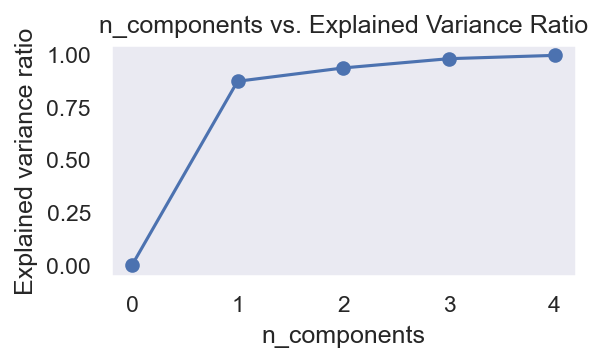

In [35]:
var_ratio = []
nums = np.arange(5)
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')


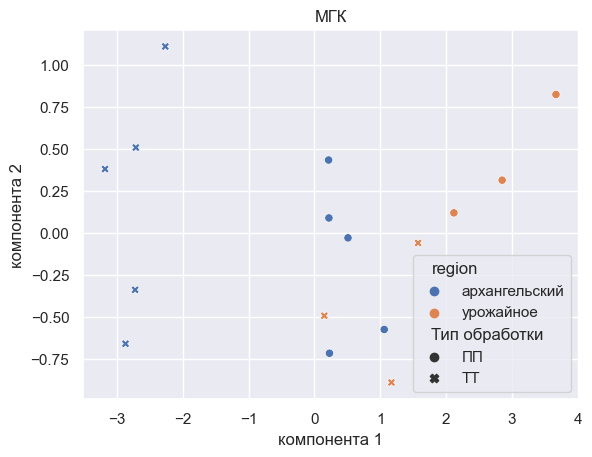

In [36]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(data_to_PCA)

n_components=5

pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = pca_df, columns = [f'компонента {i}' for i in range(1,n_components + 1)])
pca_df = total_df.iloc[:,:2].join(pca_df) 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
# Plot 2D PCA Graph
sns.scatterplot(
    x='компонента 1', 
    y='компонента 2', 
    data=pca_df, 
    hue='region',
    style = 'Тип обработки'  ,
    legend=True
    )
 
plt.title('МГК')
plt.show()